## First steps with Vaex

In [1]:
import vaex

In [2]:
!du -sh /data/airline-delays/2018.parquet

205M	/data/airline-delays/2018.parquet


In [3]:
df_2018 = vaex.open("/data/airline-delays/2018.parquet")

In [4]:
type(df_2018)

vaex.dataframe.DataFrameLocal

In [5]:
len(df_2018)

7213446

In [6]:
df_2018.info()

column,type,unit,description,expression
FL_DATE,date32[day],,,
OP_CARRIER,str,,,
OP_CARRIER_FL_NUM,int64,,,
ORIGIN,str,,,
DEST,str,,,
CRS_DEP_TIME,int64,,,
DEP_TIME,float64,,,
DEP_DELAY,float64,,,
TAXI_OUT,float64,,,
WHEELS_OFF,float64,,,


In [7]:
print(df_2018.column_names)

['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 27']


In [8]:
df_2018[
    df_2018.column_names[1:-1]  # Exclude some problematic columns
].describe()

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
data_type,string,int64,string,string,int64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
count,7213446,7213446,7213446,7213446,7213446,7101129,7096212,7097616,7097617,7094200,...,7213446,7213436,7079004,7079004,7213446,1352710,1352710,1352710,1352710,1352710
NA,0,0,0,0,0,112317,117234,115830,115829,119246,...,0,10,134442,134442,0,5860736,5860736,5860736,5860736,5860736
mean,--,2607.5313346769353,--,--,1329.6870178275403,1333.8538055005056,9.969858425875664,17.410614211870577,1357.7988777078278,1462.16200896507,...,0.0024757931230094464,141.13564825417458,136.49993840941465,111.50204831075106,799.9894896281195,19.45500587709117,3.6364594037155045,15.885470647810692,0.09353889599396767,25.644120321428836
std,--,1860.122136,--,--,490.931948,504.505513,44.829638,9.920408,505.9721,533.467478,...,0.049696,73.344327,73.137572,71.112922,598.178246,58.908098,29.995995,35.893483,3.174305,49.787743
min,--,1,--,--,1,1.0,-122.0,1.0,1.0,1.0,...,0.0,-99.0,14.0,7.0,31.0,0.0,0.0,0.0,0.0,0.0
max,--,7909,--,--,2359,2400.0,2710.0,196.0,2400.0,2400.0,...,1.0,704.0,757.0,696.0,4983.0,2109.0,2692.0,1848.0,987.0,2454.0


## The power of expressions

In [9]:
# df_2018.col.OP_CARRIER
df_2018["OP_CARRIER"]

Expression = OP_CARRIER
Length: 7,213,446 dtype: string (column)
----------------------------------------
      0  UA
      1  UA
      2  UA
      3  UA
      4  UA
    ...    
7213441  AA
7213442  AA
7213443  AA
7213444  AA
7213445  AA

In [10]:
df_2018["ACTUAL_ELAPSED_TIME"] - df_2018["CRS_ELAPSED_TIME"]

Expression = (ACTUAL_ELAPSED_TIME - CRS_ELAPSED_TIME)
Length: 7,213,446 dtype: float64 (expression)
---------------------------------------------
      0  -18
      1  -16
      2   -8
      3   -8
      4   -6
    ...     
7213441   -1
7213442   -5
7213443   16
7213444   -9
7213445  -12

In [11]:
df_2018["ACTUAL_ELAPSED_TIME - CRS_ELAPSED_TIME"]

Expression = ACTUAL_ELAPSED_TIME - CRS_ELAPSED_TIME
Length: 7,213,446 dtype: float64 (expression)
---------------------------------------------
      0  -18
      1  -16
      2   -8
      3   -8
      4   -6
    ...     
7213441   -1
7213442   -5
7213443   16
7213444   -9
7213445  -12

In [12]:
import numpy as np

In [13]:
np.sqrt(df_2018["DISTANCE"])

Expression = sqrt(DISTANCE)
Length: 7,213,446 dtype: float64 (expression)
---------------------------------------------
      0  40.0625
      1   20.347
      2  29.0861
      3  33.4664
      4  26.8887
      ...       
7213441  18.1934
7213442  30.5941
7213443  22.6053
7213444  11.4018
7213445  11.4018

In [14]:
df_2018["sqrt(DISTANCE)"]

Expression = sqrt(DISTANCE)
Length: 7,213,446 dtype: float64 (expression)
---------------------------------------------
      0  40.0625
      1   20.347
      2  29.0861
      3  33.4664
      4  26.8887
      ...       
7213441  18.1934
7213442  30.5941
7213443  22.6053
7213444  11.4018
7213445  11.4018

In [15]:
df_2018["CANCELLED"].sum()

array(116584.)

In [16]:
df_2018["ACTUAL_ELAPSED_TIME - CRS_ELAPSED_TIME"].mean(progress="rich")

Output()

array(-4.84475231)

In [17]:
# We exclude "CANCELLED" flights and ones that arrived on time
# to compute the mean delay time 
delayed = df_2018[(df_2018["CANCELLED"] == 0.0) & (df_2018["DEP_DELAY"] > 0)]
delayed["DEP_DELAY"].mean(progress="rich")

Output()

array(38.18255826)

Load all data files:

In [18]:
df = vaex.open("/data/airline-delays/*.parquet", progress="rich")
df

#,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100.0,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202.0,1206.0,4.0,0.0,,0.0,62.0,68.0,42.0,199.0,--,--,--,--,--,--
1,2009-01-01,XE,1206,EWR,IAD,1510.0,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632.0,1624.0,-8.0,0.0,,0.0,82.0,75.0,43.0,213.0,--,--,--,--,--,--
2,2009-01-01,XE,1207,EWR,DCA,1100.0,1059.0,-1.0,20.0,1119.0,1155.0,6.0,1210.0,1201.0,-9.0,0.0,,0.0,70.0,62.0,36.0,199.0,--,--,--,--,--,--
3,2009-01-01,XE,1208,DCA,EWR,1240.0,1249.0,9.0,10.0,1259.0,1336.0,9.0,1357.0,1345.0,-12.0,0.0,,0.0,77.0,56.0,37.0,199.0,--,--,--,--,--,--
4,2009-01-01,XE,1209,IAD,EWR,1715.0,1705.0,-10.0,24.0,1729.0,1809.0,13.0,1900.0,1822.0,-38.0,0.0,,0.0,105.0,77.0,40.0,213.0,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"61,556,959",2018-12-31,AA,1815,DCA,CLT,1534.0,1530.0,-4.0,20.0,1550.0,1702.0,7.0,1714.0,1709.0,-5.0,0.0,,0.0,100.0,99.0,72.0,331.0,--,--,--,--,--,--
"61,556,960",2018-12-31,AA,1816,CLT,DFW,1751.0,1757.0,6.0,18.0,1815.0,1943.0,10.0,1952.0,1953.0,1.0,0.0,,0.0,181.0,176.0,148.0,936.0,--,--,--,--,--,--
"61,556,961",2018-12-31,AA,1817,CLT,MEM,2015.0,2010.0,-5.0,36.0,2046.0,2114.0,4.0,2107.0,2118.0,11.0,0.0,,0.0,112.0,128.0,88.0,511.0,--,--,--,--,--,--
"61,556,962",2018-12-31,AA,1818,CLT,RDU,1300.0,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350.0,1404.0,14.0,0.0,,0.0,50.0,41.0,26.0,130.0,--,--,--,--,--,--


In [19]:
len(df)

61556964

In [20]:
delayed = df[(df["CANCELLED"] == 0.0) & (df["DEP_DELAY"] > 0)]
delayed["DEP_DELAY"].mean(progress="rich")

Output()

array(32.15845342)

In [21]:
import seaborn as sns
sns.set()

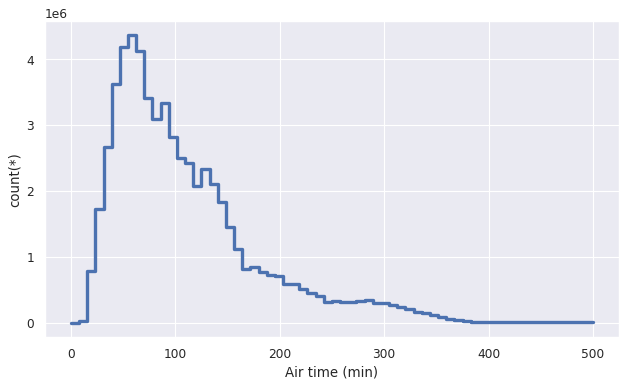

In [23]:
l, = df.viz.histogram("AIR_TIME", limits=[0, 500], lw=3, shape=64, figsize=(8, 5))
l.axes.set_xlabel("Air time (min)");